In [149]:
%load_ext autoreload
%autoreload 2

import polars as pl
import networkx as nx
import numpy as np

from src.base_classes.omic_data_loader import OmicDataLoader
from src.data_managers.concat import CatOmicDataManager

from src.gnn_utils.interactions import (
    get_mirna_genes_circrna_interactions, get_mirna_gene_interactions, gg_interactions, pp_interactions
)
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
mrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_mutation/mrna",
)
mirna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_mutation/mirna_genes",
)
circrna_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_mutation/circrna",
)
# pirna_loader = OmicDataLoader(
#     data_dir="mds_data/splits_74/pirna",
# )
te_loader = OmicDataLoader(
    data_dir="mds_data/splits_74_mutation/te_counts",
)

omic_data_loaders = {
    "mrna": mrna_loader,
    # "mirna": mirna_loader,
    # "circrna": circrna_loader,
    # # "pirna": pirna_loader,
    # "te": te_loader,
}
odm = CatOmicDataManager(omic_data_loaders, n_splits=5)

In [153]:
from src.evals.xgboost import XGBoostEvaluator

xgb_eval = XGBoostEvaluator(
    data_manager=odm,
    n_trials=80,
    verbose=True,
)
_ = xgb_eval.evaluate()
xgb_eval.print_best_results()
xgb_eval.print_best_parameters()
# xgb_eval.save_results(results_file=save_folder, row_name="XGBoost")

[I 2024-11-20 20:24:41,204] A new study created in memory with name: no-name-4bed26bf-f467-4c1e-9b4a-5e24bf1e071e
[I 2024-11-20 20:24:41,257] Trial 0 finished with value: 0.6726472562358273 and parameters: {'booster': 'gblinear', 'lambda': 7.154119707516317e-05, 'alpha': 1.5361202530541597e-05}. Best is trial 0 with value: 0.6726472562358273.
[I 2024-11-20 20:24:41,324] Trial 1 finished with value: 0.2582725925925926 and parameters: {'booster': 'gbtree', 'lambda': 1.3020154103734478e-07, 'alpha': 5.905235304468825e-07, 'max_depth': 8, 'eta': 0.027730171517828073, 'gamma': 0.03011073864229945, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.6726472562358273.
[I 2024-11-20 20:24:41,386] Trial 2 finished with value: 0.29145508692365835 and parameters: {'booster': 'dart', 'lambda': 7.059725294901559e-07, 'alpha': 2.1478343735591988e-08, 'max_depth': 1, 'eta': 0.10879253902472333, 'gamma': 1.1471638796065106e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_ty

New best score: 0.673
Best model performance:
Accuracy: 0.880 ± 0.098
F1 Macro: 0.872 ± 0.105
F1 Weighted: 0.876 ± 0.101
[{'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.8, 'f1_macro': np.float64(0.8), 'f1_weighted': np.float64(0.8)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.8, 'f1_macro': np.float64(0.8), 'f1_weighted': np.float64(0.8)}]


[I 2024-11-20 20:24:41,484] Trial 3 finished with value: 0.33674565457294026 and parameters: {'booster': 'dart', 'lambda': 0.08355685218574342, 'alpha': 3.4333542124541413e-06, 'max_depth': 7, 'eta': 0.32070233627752376, 'gamma': 0.013071742502007235, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.018240543489863e-08, 'skip_drop': 0.001917698679151375}. Best is trial 0 with value: 0.6726472562358273.
[I 2024-11-20 20:24:41,552] Trial 4 finished with value: 0.29145508692365835 and parameters: {'booster': 'dart', 'lambda': 0.2820137284750847, 'alpha': 0.12485162700324225, 'max_depth': 6, 'eta': 1.8294921241800703e-06, 'gamma': 3.37990165840402e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00014685738948011018, 'skip_drop': 2.8925833856722635e-07}. Best is trial 0 with value: 0.6726472562358273.
[I 2024-11-20 20:24:41,617] Trial 5 finished with value: 0.2840100075585789 and parameters

New best score: 0.687
Best model performance:
Accuracy: 0.887 ± 0.093
F1 Macro: 0.878 ± 0.102
F1 Weighted: 0.882 ± 0.098
[{'acc': 0.8333333333333334, 'f1_macro': np.float64(0.8285714285714285), 'f1_weighted': np.float64(0.8285714285714286)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 0.8, 'f1_macro': np.float64(0.8), 'f1_weighted': np.float64(0.8)}]


[I 2024-11-20 20:24:42,572] Trial 19 finished with value: 0.6788906666666669 and parameters: {'booster': 'gblinear', 'lambda': 0.00035652663465537244, 'alpha': 0.006143235771663186}. Best is trial 15 with value: 0.6866314497354498.
[I 2024-11-20 20:24:42,628] Trial 20 finished with value: 0.10657500000000002 and parameters: {'booster': 'gblinear', 'lambda': 0.0004884647528241016, 'alpha': 0.3561890014476226}. Best is trial 15 with value: 0.6866314497354498.
[I 2024-11-20 20:24:42,681] Trial 21 finished with value: 0.6788906666666669 and parameters: {'booster': 'gblinear', 'lambda': 0.00011106176144496828, 'alpha': 0.01094198686588803}. Best is trial 15 with value: 0.6866314497354498.
[I 2024-11-20 20:24:42,734] Trial 22 finished with value: 0.6788906666666669 and parameters: {'booster': 'gblinear', 'lambda': 3.878074739395473e-06, 'alpha': 0.018601224531050724}. Best is trial 15 with value: 0.6866314497354498.
[I 2024-11-20 20:24:42,789] Trial 23 finished with value: 0.6788906666666669

New best score: 0.769
Best model performance:
Accuracy: 0.920 ± 0.098
F1 Macro: 0.912 ± 0.108
F1 Weighted: 0.916 ± 0.103
[{'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.8, 'f1_macro': np.float64(0.8), 'f1_weighted': np.float64(0.8)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}, {'acc': 0.8, 'f1_macro': np.float64(0.7619047619047619), 'f1_weighted': np.float64(0.7809523809523808)}, {'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}]


[I 2024-11-20 20:24:43,325] Trial 31 finished with value: 0.6788906666666669 and parameters: {'booster': 'gblinear', 'lambda': 1.865780919416761e-05, 'alpha': 0.006000611134860388}. Best is trial 28 with value: 0.7690415600907027.
[I 2024-11-20 20:24:43,377] Trial 32 finished with value: 0.6788906666666669 and parameters: {'booster': 'gblinear', 'lambda': 2.1607061912331955e-07, 'alpha': 0.02368484847881684}. Best is trial 28 with value: 0.7690415600907027.
[I 2024-11-20 20:24:43,431] Trial 33 finished with value: 0.6726472562358273 and parameters: {'booster': 'gblinear', 'lambda': 0.00012734954983960577, 'alpha': 0.0007871242517874313}. Best is trial 28 with value: 0.7690415600907027.
[I 2024-11-20 20:24:43,482] Trial 34 finished with value: 0.7690415600907027 and parameters: {'booster': 'gblinear', 'lambda': 1.0014169692401951e-05, 'alpha': 4.84883150335739e-06}. Best is trial 28 with value: 0.7690415600907027.
[I 2024-11-20 20:24:43,535] Trial 35 finished with value: 0.6726472562358

Best model performance:
Accuracy: 0.920 ± 0.098
F1 Macro: 0.912 ± 0.108
F1 Weighted: 0.916 ± 0.103
Best hyperparameters:
{'booster': 'gblinear', 'lambda': 1.5461185794371186e-06, 'alpha': 0.0032983933171710274}


In [157]:
feat_importances = xgb_eval.get_feature_importances(xgb_eval.best_params)

fi_sorted = dict(sorted(feat_importances.items(), key=lambda x: abs(x[1]), reverse=True))

{'acc': 1.0, 'f1_macro': np.float64(1.0), 'f1_weighted': np.float64(1.0)}
{'ENSG00000178773': [-0.7334580421447754, 0.6914590001106262], 'ENSG00000137831': [0.012705342844128609, -0.007582290098071098], 'ENSG00000186446': [0.007586000952869654, -0.002903205342590809], 'ENSG00000234616': [0.5408860445022583, -0.5247125029563904], 'ENSG00000077935': [-0.19041679799556732, 0.19740408658981323], 'ENSG00000180336': [-0.2244976907968521, 0.2573947310447693], 'ENSG00000244165': [-0.1767163872718811, 0.1347634643316269], 'ENSG00000080493': [0.1015210747718811, -0.08472220599651337], 'ENSG00000005187': [0.0, 1.5906296539469622e-05], 'ENSG00000023445': [0.19879914820194244, -0.1649170070886612], 'ENSG00000144407': [-0.1728396862745285, 0.1395951509475708], 'ENSG00000123892': [-2.105200292135123e-05, 1.2558438356791157e-05], 'ENSG00000187134': [-0.11001589894294739, 0.13577532768249512], 'ENSG00000158457': [0.04776094853878021, -0.0720384418964386], 'ENSG00000214736': [0.18719911575317383, -0.192

In [158]:
mrna = pl.read_csv("mds_data/preprocessed_74/mrna.csv")
mirna = pl.read_csv("mds_data/preprocessed_74/mirna_genes.csv")

mrna_gene = mrna.select("GENE_NAME", "GENE_ID")
mirna_gene = mirna.select("GENE_NAME", "GENE_ID")

# create one big dict to go from id to name
mrna_dict = dict(zip(mrna_gene["GENE_ID"], mrna_gene["GENE_NAME"]))
mirna_dict = dict(zip(mirna_gene["GENE_ID"], mirna_gene["GENE_NAME"]))

# merge the dicts
mrna_dict.update(mirna_dict)

# rename the keys from fi_sorted to the name of the gene if it exists in mrna_dict
fi_nn = {mrna_dict.get(k, k): v for k, v in fi_sorted.items()}

- [RELT family in cancer RELL1](https://pmc.ncbi.nlm.nih.gov/articles/PMC10603948/)
- [PHLDA3 in hematopoesis](https://pmc.ncbi.nlm.nih.gov/articles/PMC6218282/)
- [PYGM is a glycogen gene, this study mentions the role of that in cancer](https://pmc.ncbi.nlm.nih.gov/articles/PMC7667517/)
- [TUBB is a good biomarker](https://www.frontiersin.org/journals/molecular-biosciences/articles/10.3389/fmolb.2024.1365655/full)

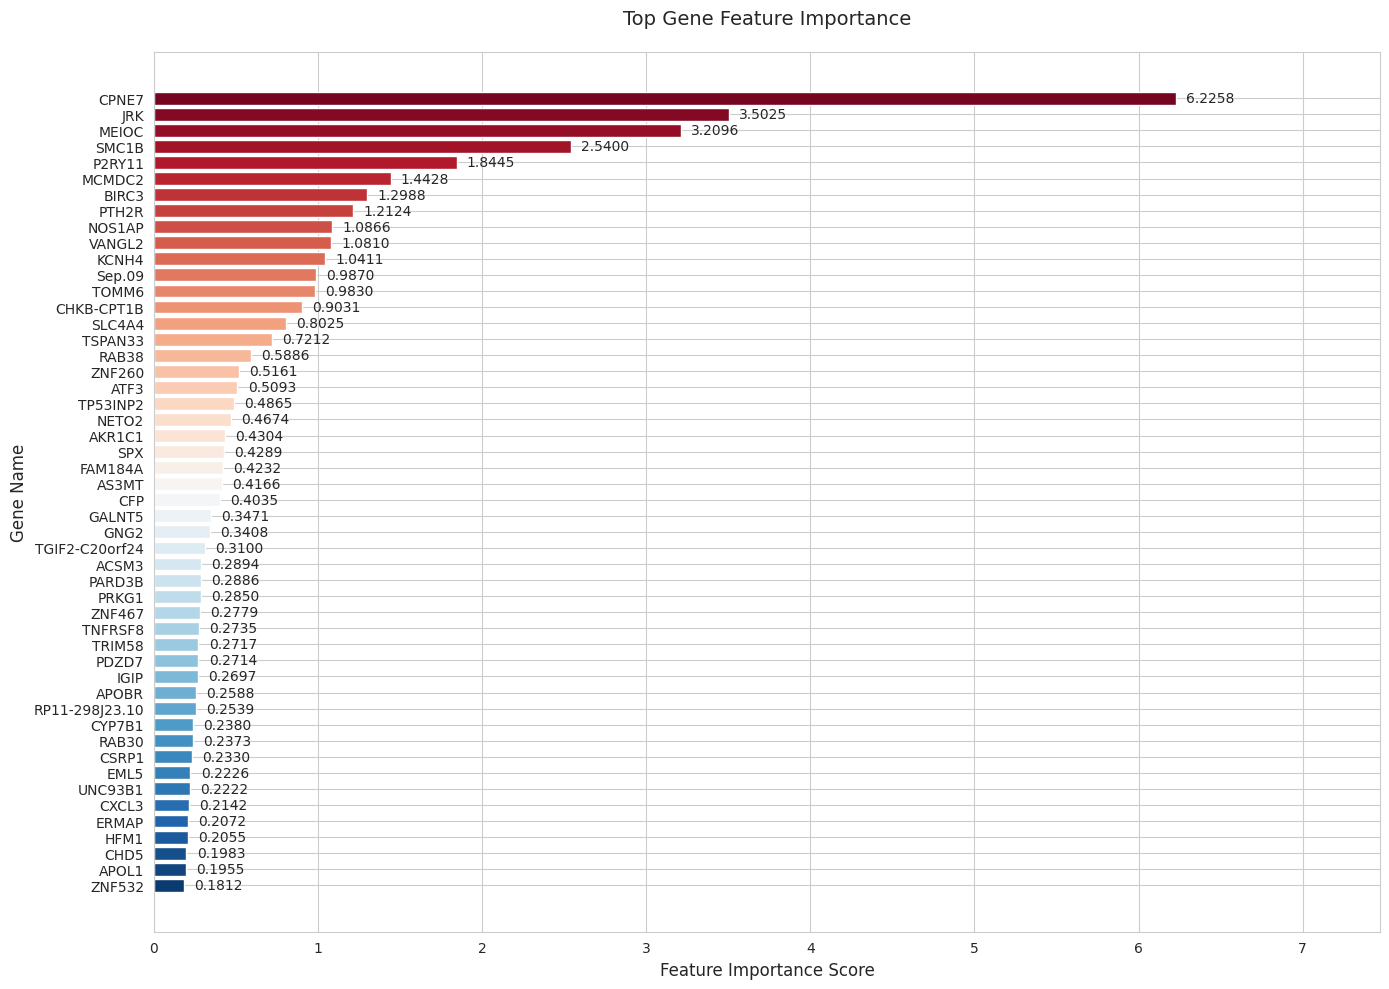

In [159]:
from src.plotting.feature_importance_plot import plot_top_genes

_ = plot_top_genes(fi_nn, n_genes=50, title="Top Genes", save_file="plots/mutation/mds_mutation_feature_importances_mrna_only.png")

In [160]:
mrna_dict = {}
mirna_dict = {}
circrna_dict = {}

# go trough the fi_nn dict and sort it into three lists of mrna, mirna and circrna
for k, v in fi_nn.items():
    if k.startswith("MIR"):
        mirna_dict[k] = v
    elif k.startswith("hsa_circ"):
        circrna_dict[k] = v
    else:
        mrna_dict[k] = v

# keep only top 30 out of each list
n_top_genes = 200
mrna_dict = {k: v for k, v in sorted(mrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
mirna_dict = {k: v for k, v in sorted(mirna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}
circrna_dict = {k: v for k, v in sorted(circrna_dict.items(), key=lambda item: item[1], reverse=True)[:n_top_genes]}

In [161]:
mrna_genes = list(mrna_dict.keys())
mirna_genes = list(mirna_dict.keys())
circrna_names = list(circrna_dict.keys())

gg_A = gg_interactions(mrna_genes, mrna_genes)
pp_A = pp_interactions(mrna_genes, mrna_genes)
mrna_A = torch.logical_or(gg_A, pp_A).int()

mirna_gene_A = get_mirna_gene_interactions(mirna_genes, mrna_genes, mirna_mrna_db="interaction_data/mirna_genes_mrna.csv")

# interactions are in a shape of (mirnas, circrnas)
circrna_mirna_A = get_mirna_genes_circrna_interactions(
    mirna_names=mirna_genes,
    circrna_names=circrna_names,
    mirna_circrna_interactions="interaction_data/circrna_mirna_interactions_mirbase.csv",
)

mrna_A.sum(), mirna_gene_A.sum(), circrna_mirna_A.sum()

(tensor(102), tensor(0.), tensor(0.))

5527


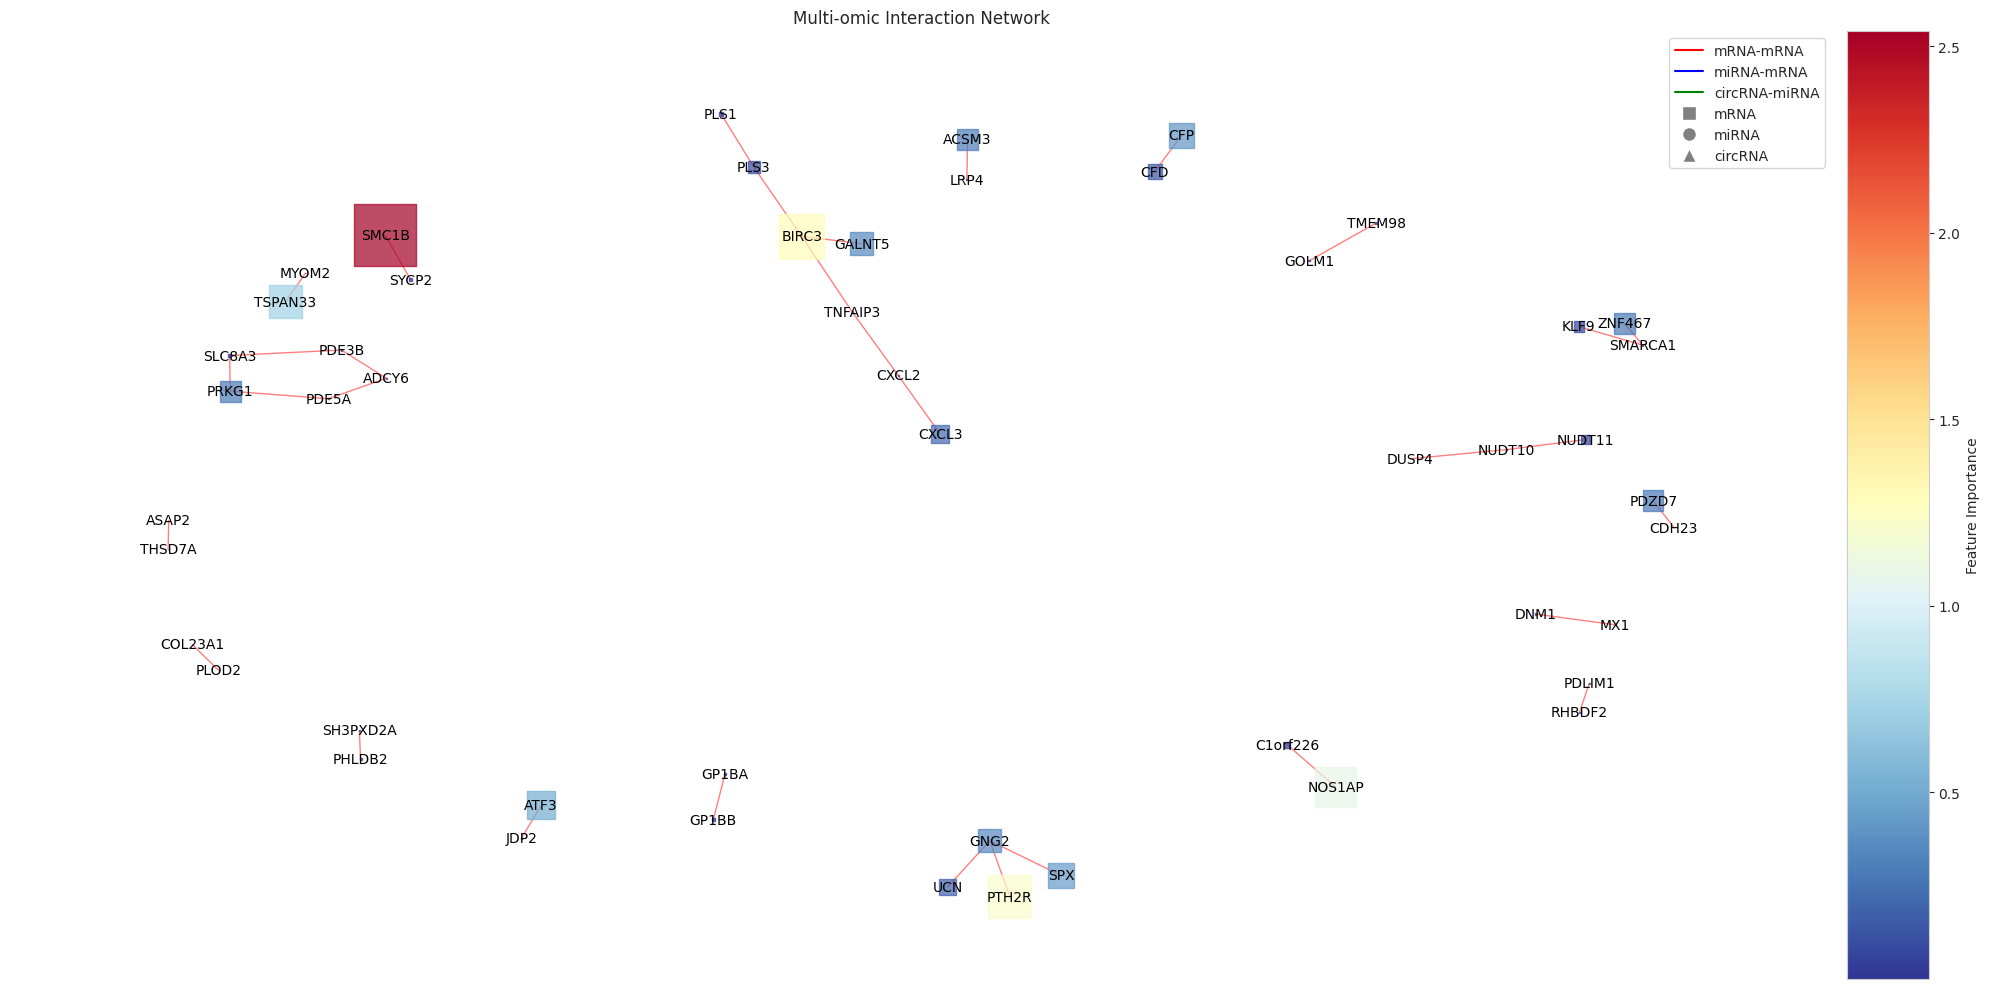

In [162]:
from src.plotting.graph_plotting import create_multi_omic_network, plot_multi_omic_network

# Example usage:
G = create_multi_omic_network(mrna_dict, mirna_dict, circrna_dict, 
                             mrna_A, mirna_gene_A, circrna_mirna_A)

# generate a random number
# seed = 8894 # 7306 - disease
# seed = 4580 # - risk
seed = np.random.randint(0, 10000)
print(seed)
fig = plot_multi_omic_network(G, seed=seed, k=4, iterations=1100)
fig.savefig('plots/mutation/multi_omic_network.png', dpi=400)

- [CPNE8 is linked to AML, CPNE7 is a candidate tumor suppresor gene](https://pmc.ncbi.nlm.nih.gov/articles/PMC8345009/)
- interestingly the mutated gene SF3B1 has not been selected as a significant feature
- MIR604 not a significant predictor

In [82]:
mut_sample_ids = mrna_loader.get_fold(0)[0]['sample_ids'].to_list()

mrna = pl.read_csv("mds_data/raw/200625_allRNA_fromRNAseq_annot_hg38.tsv", separator="\t")
mrna_cols = [
    col.split("_")[0] for col in mrna.columns[6:]
]
rename_dict = dict(zip(mrna.columns[6:], mrna_cols))
mrna = mrna.rename(rename_dict)

mrna_cols = []
sf3b1 = (
    mrna
        .filter(pl.col("GENE_NAME") == "SF3B1")
        .drop("CHR", "START", "END", "GENE_TYPE", "GENE_ID", "GENE_NAME")
        .select(mut_sample_ids)
)
sf3b1

V108,V125,V1505,V1528,V1591,V1788,V1800,V1874,V2110,V2133,V2241,V359,V513,V624,V630,V637,V716,V777,V806,V888
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
36129,33185,52267,46423,43329,51512,40864,60640,31849,3948,25858,37425,36563,59770,48422,8937,58799,38037,35270,39524


In [81]:
ss = mrna_loader.get_fold(0)[0].select(["sample_ids", "class"])

with pl.Config(tbl_cols=-1, tbl_rows=-1):
    print(ss)

class_0 = ss.filter(pl.col("class") == 0)['sample_ids'].to_list()
class_1 = ss.filter(pl.col("class") == 1)['sample_ids'].to_list()

shape: (20, 2)
┌────────────┬───────┐
│ sample_ids ┆ class │
│ ---        ┆ ---   │
│ str        ┆ i64   │
╞════════════╪═══════╡
│ V108       ┆ 1     │
│ V125       ┆ 1     │
│ V1505      ┆ 0     │
│ V1528      ┆ 0     │
│ V1591      ┆ 0     │
│ V1788      ┆ 1     │
│ V1800      ┆ 1     │
│ V1874      ┆ 0     │
│ V2110      ┆ 0     │
│ V2133      ┆ 0     │
│ V2241      ┆ 0     │
│ V359       ┆ 1     │
│ V513       ┆ 0     │
│ V624       ┆ 1     │
│ V630       ┆ 0     │
│ V637       ┆ 0     │
│ V716       ┆ 1     │
│ V777       ┆ 0     │
│ V806       ┆ 1     │
│ V888       ┆ 1     │
└────────────┴───────┘


Text(0, 0.5, 'Expression')

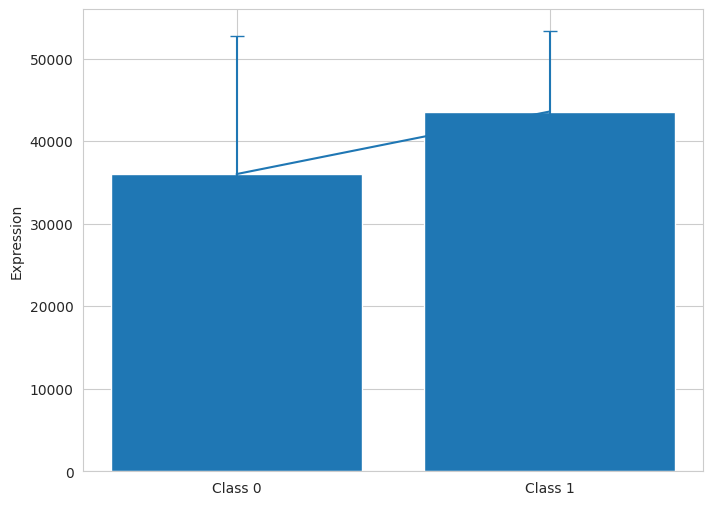

In [88]:
class_0_exp = sf3b1.select(class_0).to_numpy()[0]
class_1_exp = sf3b1.select(class_1).to_numpy()[0]

import matplotlib.pyplot as plt

# plot this as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Class 0', 'Class 1'], [class_0_exp.mean(), class_1_exp.mean()])
plt.errorbar(['Class 0', 'Class 1'], [class_0_exp.mean(), class_1_exp.mean()], yerr=[class_0_exp.std(), class_1_exp.std()], capsize=5)
plt.ylabel('Expression')

In [89]:
# statistical test to compare the means
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(class_0_exp, class_1_exp)
print("T-statistic:", t_stat)
print("p-value:", p_val)

T-statistic: -1.1428307888451155
p-value: 0.2680823675486712
